# EMAIL SPAM DETECTOR

### Context
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged according being ham (legitimate) or spam.

### Content
What is a Spam Filtering?
Spam Detector is used to detect unwanted, malicious and virus infected texts and helps to separate them from the nonspam texts. It uses a binary type of classification containing the labels such as ‘ham’ (nonspam) and spam. Application of this can be seen in Google Mail (GMAIL) where it segregates the spam emails in order to prevent them from getting into the user’s inbox.

The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.
This corpus has been collected from free or free for research sources at the Internet:
-> A collection of 5573 rows SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. 
-> A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. 


# Import the dataset with required libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('spam.txt',encoding='latin-1')

In [35]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ã_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [36]:
#checking the top 5 and bottom 5 rows of the dataset:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [37]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ã_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [38]:
#checking random 10 rows of the dataset
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
352,ham,TODAY is Sorry day.! If ever i was angry with ...,NaN,NaN,NaN
4698,ham,Yes fine,NaN,NaN,NaN
2239,ham,Every day i use to sleep after &lt;#&gt; so ...,NaN,NaN,NaN
4965,spam,URGENT! We are trying to contact U. Todays dra...,NaN,NaN,NaN
493,ham,What class of &lt;#&gt; reunion?,NaN,NaN,NaN
3463,ham,My phone,NaN,NaN,NaN
835,ham,Good Morning my Dear........... Have a great &...,NaN,NaN,NaN
4795,spam,URGENT This is our 2nd attempt to contact U. Y...,NaN,NaN,NaN
4010,spam,Please call our customer service representativ...,NaN,NaN,NaN
1804,ham,The bus leaves at &lt;#&gt;,NaN,NaN,NaN


# Exploratory Data Analysis (EDA)

In [39]:
df.shape

(5572, 5)

- We can see that there are 5572 rows and 5 columns.

In [40]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


- We can see that we have object datatypes.

In [42]:
# Checking the missing or null values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

- We can see that columns 'Unnamed:2, Unnamed:3, Unnamed:4' have huge number of missing values in it.

# Data Cleaning

In [43]:
#Now drop the unuse column

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [44]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [45]:
#Now rename the column name

df.rename(columns={'v1' : 'Catagory','v2' : 'Email Body'},inplace=True)

In [46]:
df.sample(10)

,Catagory,Email Body
4025,ham,Oh ok.. Wat's ur email?
5422,ham,Ok k..sry i knw 2 siva..tats y i askd..
946,spam,Ur cash-balance is currently 500 pounds - to m...
2423,ham,Lmao but its so fun...
1617,ham,Did u download the fring app?
473,spam,Want 2 get laid tonight? Want real Dogging loc...
2968,ham,Ma head dey swell oh. Thanks for making my day
5317,ham,"K, fyi I'm back in my parents' place in south ..."
740,ham,Yes i will be there. Glad you made it.
3467,ham,yay! finally lol. i missed our cinema trip las...


In [47]:
#Now apply the LableEncoder method on ""Catagory"" column

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [48]:
df['Catagory'] = encoder.fit_transform(df['Catagory'])

In [49]:
#Here in the Catagory column have two value 1st Ham and 2nd spam.
#So after applying the LabelEncoder method change the value from 0 or 1.
#Here Ham=0 and Spam=1

df.sample(10)

,Catagory,Email Body
2010,0,Dunno lei... I thk mum lazy to go out... I nev...
5539,0,Just sleeping..and surfing
984,0,Yo guess what I just dropped
5219,0,Pls she needs to dat slowly or she will vomit ...
287,0,hi baby im cruisin with my girl friend what r ...
4105,0,K then 2marrow are you coming to class.
49,0,U don't know how stubborn I am. I didn't even ...
1185,0,Annoying isn't it.
1634,1,"Eerie Nokia tones 4u, rply TONE TITLE to 8007 ..."
4465,0,Hey u still at the gym?


In [50]:
#Now check duplicate values and removed.

df.duplicated().sum()

403

In [51]:
df = df.drop_duplicates(keep='first')

In [52]:
df.duplicated().sum()

0

In [53]:
df.shape

(5169, 2)

In [54]:
df['Catagory'].value_counts()

0    4516
1     653
Name: Catagory, dtype: int64

# Data Visualization

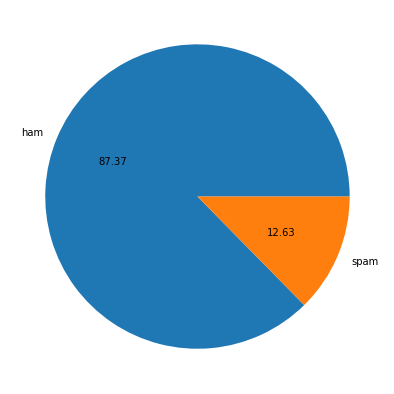

In [55]:
#Now create PieChart for better understanding
fig, ax = plt.subplots(figsize =(10, 7))
colors = ( "orange", "cyan")
plt.pie(df['Catagory'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [56]:
!pip install nltk


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
import nltk

In [58]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [59]:
#Now we have creat a 3-columns for help of email body.
#Let's see the lenth of email body.

df['num_chr'] = df['Email Body'].apply(len)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7444\1596439084.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_chr'] = df['Email Body'].apply(len)


In [60]:
df.sample(10)

,Catagory,Email Body,num_chr
4293,1,Kit Strip - you have been billed 150p. Netcoll...,74
3767,0,Where are you call me.,22
558,0,Hi Princess! Thank you for the pics. You are v...,70
4859,0,"\Response\"" is one of d powerful weapon 2 occu...",80
2339,0,Cheers for the message Zogtorius. IÃ¥Ãve been...,110
4098,0,If u dun drive then how i go 2 sch.,35
4935,0,K..k.:)congratulation ..,24
2409,0,Aww that's the first time u said u missed me w...,99
4290,0,Call me when u're done...,25
1675,0,Painful words- \I thought being Happy was the ...,81


In [61]:
#We calculate num. of words for each email body with help of NLTK.

df['num_words'] = df['Email Body'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Admin\AppData\Local\Temp\ipykernel_7444\3741171657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['Email Body'].apply(lambda x:len(nltk.word_tokenize(x)))


In [62]:
df.sample(5)

,Catagory,Email Body,num_chr,num_words
951,0,Shb b ok lor... Thanx...,24,7
703,0,"Thats a bit weird, even ?- where is the do sup...",109,28
2413,0,Lol please do. Actually send a pic of yourself...,116,28
3372,0,Looks like you found something to do other tha...,65,14
1588,0,At 4. Let's go to bill millers,30,9


In [63]:
#Apply the same rule for calculated sentences.

df['num_sent'] = df['Email Body'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Admin\AppData\Local\Temp\ipykernel_7444\3670548077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sent'] = df['Email Body'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [64]:
df.sample(5)

,Catagory,Email Body,num_chr,num_words,num_sent
2822,0,Then u ask darren go n pick u lor... But i oso...,74,20,2
2958,0,Buzzzz! *grins* Did I buzz your ass? Buzz your...,147,37,7
3059,0,K..k...from tomorrow onwards started ah?,40,10,1
1107,0,From someone not to smoke when every time I've...,140,29,1
3288,1,Camera - You are awarded a SiPix Digital Camer...,105,19,3


In [65]:
df[['num_chr','num_words','num_sent']].describe()

,num_chr,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,79.200426,18.454246,1.948152
std,58.387001,13.325668,1.363792
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [66]:
#Now we describe the catagory based like Ham and spam.

#Ham
df[df['Catagory'] == 0][['num_chr','num_words','num_sent']].describe()

,num_chr,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.590788,17.120903,1.799601
std,56.405390,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [67]:
#Spam
df[df['Catagory'] == 1][['num_chr','num_words','num_sent']].describe()

,num_chr,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,138.742726,27.675345,2.975498
std,30.419480,7.011513,1.487993
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,226.000000,46.000000,8.000000


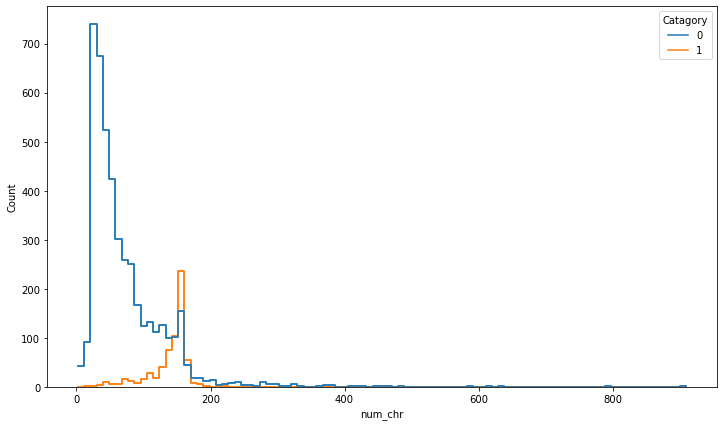

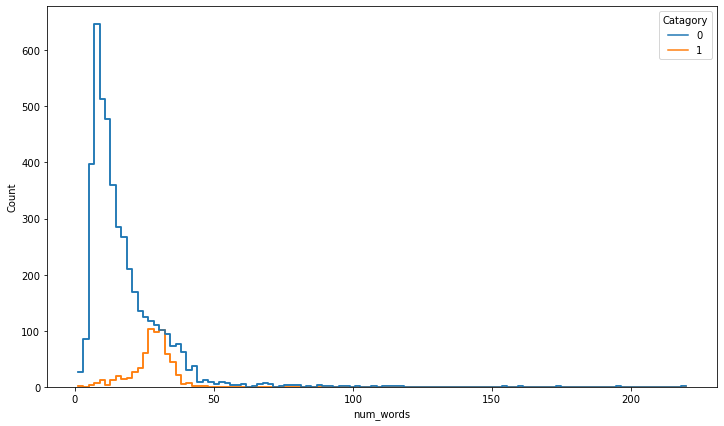

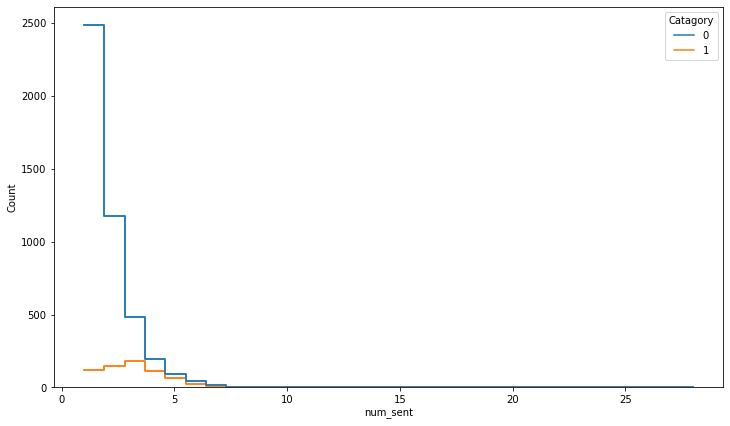

In [68]:
#Create Histogram.

plt.figure(figsize=(12,7))
sns.histplot(data=df, x="num_chr", hue="Catagory",fill=False, element="step")
sns.histplot(data=df, x="num_chr", hue="Catagory",fill=False, element="step")
plt.show()

plt.figure(figsize=(12,7))
sns.histplot(data=df, x="num_words", hue="Catagory",fill=False, element="step")
sns.histplot(data=df, x="num_words", hue="Catagory",fill=False, element="step")
plt.show()

plt.figure(figsize=(12,7))
sns.histplot(data=df, x="num_sent", hue="Catagory",fill=False, element="step",bins=30)
sns.histplot(data=df, x="num_sent", hue="Catagory",fill=False, element="step",bins=30)
plt.show()

<Figure size 864x504 with 0 Axes>

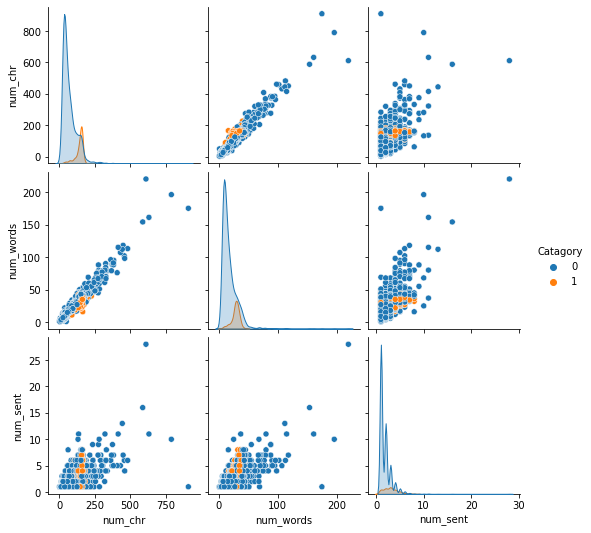

In [69]:
#Creat PaiPlot for define the relationship b/w columns.

plt.figure(figsize=(12,7))
sns.pairplot(df,hue="Catagory")
plt.show()

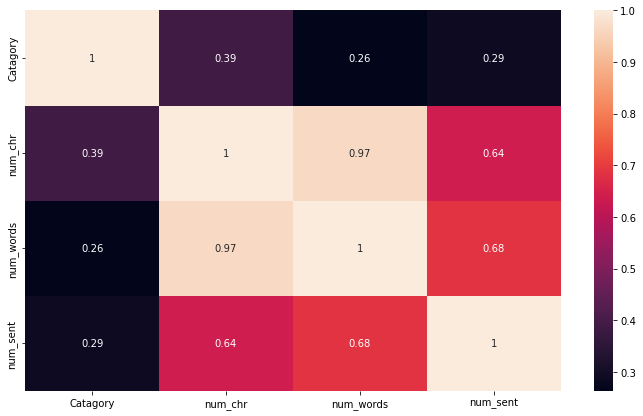

In [70]:
#Corelation heatmap

plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Data Preprocessing

### FlowChart:
1.Lower Case >>>> 2.Tokenization >>> 3.Removing special charector >>> 4.Removing stop words and punctuations >>> 5.Stemming

In [71]:
def transform_text(text):
#Lowercase    
    text = text.lower()
    
#Tokenization    
    text = nltk.word_tokenize(text)
    
#RemoveSpecialChar    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
#StopWords & Stemming    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
        
    return " ".join(y)

In [72]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [73]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [74]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [75]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Loving')

'love'

In [76]:
transform_text('Host-based IDPS for linux systems.')

'idp linux system'

In [77]:
df['Email Body'][1500]

'Host-based IDPS for linux systems.'

In [78]:
df['Transform Text'] = df['Email Body'].apply(transform_text)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7444\636474127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transform Text'] = df['Email Body'].apply(transform_text)


In [79]:
df.sample(5)

,Catagory,Email Body,num_chr,num_words,num_sent,Transform Text
2541,0,I dont. Can you send it to me. Plus how's mode.,47,15,3,dont send plu mode
2252,0,Den wat will e schedule b lk on sun?,36,10,1,den wat e schedul b lk sun
4082,0,"Good afternoon, my love. It was good to see yo...",153,39,4,good afternoon love good see word ym get tm sm...
5528,0,Its just the effect of irritation. Just ignore it,49,10,2,effect irrit ignor
2669,1,we tried to contact you re your response to ou...,130,25,1,tri contact respons offer new nokia fone camco...


# Create WordCloud

In [80]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

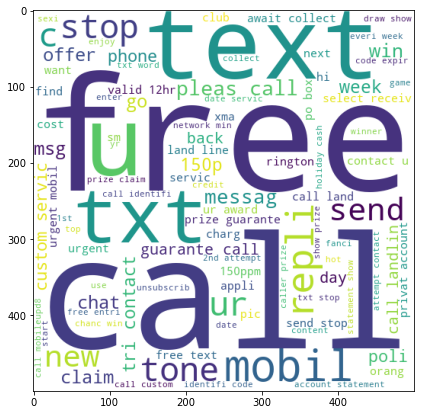

In [81]:
Spam_WC = wc.generate(df[df['Catagory'] == 1]['Transform Text'].str.cat(sep=" "))

plt.figure(figsize=(8,7))
plt.imshow(Spam_WC)

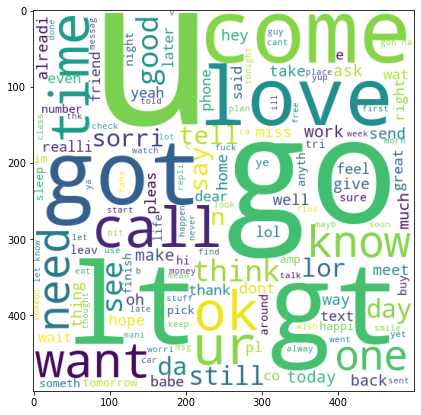

In [82]:
Ham_WC = wc.generate(df[df['Catagory'] == 0]['Transform Text'].str.cat(sep=" "))

plt.figure(figsize=(8,7))
plt.imshow(Ham_WC)

Top 20 words for spam and ham messages.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


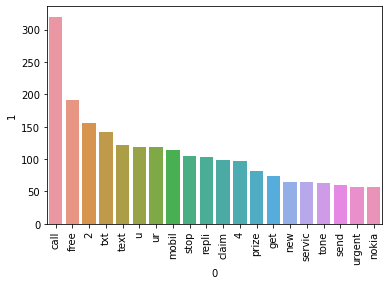

In [83]:
spam_corpus = []
for msg in df[df['Catagory'] == 1]['Transform Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
len(spam_corpus)

#Viz:

from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(20))[0],pd.DataFrame(Counter(spam_corpus).most_common(20))[1])

plt.xticks(rotation='vertical')
plt.show()

In [84]:
Ham_corpus = []
for msg in df[df['Catagory'] == 0]['Transform Text'].tolist():
    for word in msg.split():
        Ham_corpus.append(word)

In [85]:
len(Ham_corpus)

35295

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


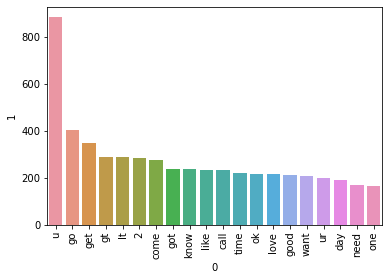

In [86]:
#Viz:

from collections import Counter
sns.barplot(pd.DataFrame(Counter(Ham_corpus).most_common(20))[0],pd.DataFrame(Counter(Ham_corpus).most_common(20))[1])

plt.xticks(rotation='vertical')
plt.show()

# 4th Step Model Building

### Text vectorization using Bag of words method

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [89]:
A = cv.fit_transform(df['Transform Text']).toarray()

In [90]:
#5169=SMS & 6708=Words
A.shape

(5169, 6674)

In [91]:
B = df['Catagory'].values

In [92]:
B

array([0, 0, 1, ..., 0, 0, 0])

Now train test split

In [93]:
from sklearn.model_selection import train_test_split
A_train,A_test,B_train,B_test = train_test_split(A,B,test_size=0.2,random_state=2)

Model from CountVectorizer

In [94]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [95]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [96]:
gnb.fit(A_train,B_train)
b_pred1 = gnb.predict(A_test)
print(accuracy_score(B_test,b_pred1))
print(confusion_matrix(B_test,b_pred1))
print(precision_score(B_test,b_pred1))

0.8781431334622823
[[790 106]
 [ 20 118]]
0.5267857142857143


In [97]:
mnb.fit(A_train,B_train)
b_pred2 = mnb.predict(A_test)
print(accuracy_score(B_test,b_pred2))
print(confusion_matrix(B_test,b_pred2))
print(precision_score(B_test,b_pred2))

0.965183752417795
[[872  24]
 [ 12 126]]
0.84


In [98]:
bnb.fit(A_train,B_train)
b_pred3 = bnb.predict(A_test)
print(accuracy_score(B_test,b_pred3))
print(confusion_matrix(B_test,b_pred3))
print(precision_score(B_test,b_pred3))

0.971953578336557
[[894   2]
 [ 27 111]]
0.9823008849557522


### Model from TFIDVectorizer

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [101]:
A = tfidf.fit_transform(df['Transform Text']).toarray()

In [102]:
#5169=SMS & 6708=Words
A.shape

(5169, 3000)

In [103]:
B = df['Catagory'].values

In [104]:
from sklearn.model_selection import train_test_split
A_train,A_test,B_train,B_test = train_test_split(A,B,test_size=0.2,random_state=2)

In [105]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [106]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [107]:
gnb.fit(A_train,B_train)
b_pred1 = gnb.predict(A_test)
print(accuracy_score(B_test,b_pred1))
print(confusion_matrix(B_test,b_pred1))
print(precision_score(B_test,b_pred1))

0.8733075435203095
[[791 105]
 [ 26 112]]
0.5161290322580645


In [108]:
mnb.fit(A_train,B_train)
b_pred2 = mnb.predict(A_test)
print(accuracy_score(B_test,b_pred2))
print(confusion_matrix(B_test,b_pred2))
print(precision_score(B_test,b_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [109]:
bnb.fit(A_train,B_train)
b_pred3 = bnb.predict(A_test)
print(accuracy_score(B_test,b_pred3))
print(confusion_matrix(B_test,b_pred3))
print(precision_score(B_test,b_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [110]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))